## PyBEAM Tutorial 4: Base model with leaky integration.

In this script, we demonstrate how to build a model with leaky integration. If you have not done so already, go through the tutorial1 and tutorial2 jupyter notebooks.

First, as before, import PyBEAM's default module.


In [1]:
# import PyBEAM's default module
import pybeam.default as pbd


We next define the model we intend to use. As before, we start with the base model type. Then, since we desire leaky integration, we change the leakage key from False to True. Per parse_model, this adds one additional parameter to the model, 'l', which indicates the leakage rate (see publication for details).


In [2]:
# define model
model = {'type' : 'base',  # model type ('base' or 'ugm')
        'sigma' : 1.0,     # sets sigma, the noise parameter
    'threshold' : 'fixed', # sets threshold type (fixed, linear, exponential, or weibull)
      'leakage' : True,    # if True, drift rate has leaky integration
        'delay' : False,   # if True, decision threshold motion is delayed (only for non-fixed thresholds)
'contamination' : False}   # if True, uniform contamination added ot model

# outputs which keys your model uses for phi
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'l', 'a']

We now simulate data from the model. Since leakage is generally a difficult parameter to recover with only one condtion, we simulate a two condition model in this example. As with tutorial 2, the first data set has a = 0.5 while the second has a = 0.75. This is equivalent to having two different caution conditions in an experiment.


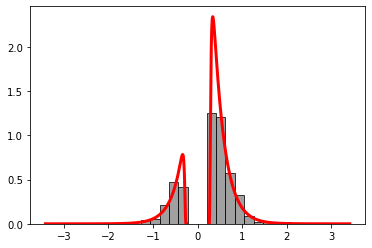

In [3]:
# parameters for synthetic data
phi0 = {'t_nd' : 0.25, # non-decision time
           'w' : 0.5,  # relative start point
          'mu' : 1.0,  # drift rate
           'l' : 3.0,
           'a' : 0.5}  # decision threshold location

# generate synthetic data
rt0 = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                          model = model, # dictionary containing model information
                            phi = phi0)  # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi0,  # parameters used for model rt distribution
               rt = rt0);  # dictionary of simulated rt data


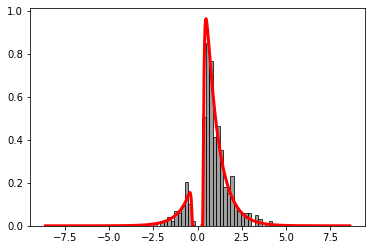

In [4]:
# parameters for synthetic data
phi1 = {'t_nd' : 0.25, # non-decision time
           'w' : 0.5,  # relative start point
          'mu' : 1.0,  # drift rate
           'l' : 3.0,
           'a' : 0.75}  # decision threshold location

# generate synthetic data
rt1 = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                          model = model, # dictionary containing model information
                            phi = phi1)  # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi1,  # parameters used for model rt distribution
               rt = rt1);  # dictionary of simulated rt data


We now proceed as in tutorials 1 and 2, and 3, defining priors, conditions, and running the inference tool.


In [5]:
# define model priors
p = {'pt_nd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
        'pw' : 'Uniform("w", lower = 0.3, upper = 0.7)', # relative start point prior
       'pmu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', # drift rate prior
        'pl' : 'Uniform("l", lower = 0.0, upper = 10.0)', # drift rate prior
       'pa0' : 'Uniform("a0", lower = 0.25, upper = 1.5)', # decision threshold prior
       'pa1' : 'Uniform("a1", lower = 0.25, upper = 1.5)'} # decision threshold prior

# define model condition
c0 = {'rt' : rt0,     # dictionary containing reaction time data
    't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
       'w' : 'pw',    # prior for relative start point, references p['pw']
      'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
       'l' : 'pl',    # prior for the drift rate, references p['pmu']
       'a' : 'pa0'}   # prior for the t rate, references p['pmu']

c1 = {'rt' : rt1,     # dictionary containing reaction time data
    't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
       'w' : 'pw',    # prior for relative start point, references p['pw']
      'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
       'l' : 'pl',    # prior for the drift rate, references p['pmu']
       'a' : 'pa1'}   # prior for the t rate, references p['pmu']


# load conditions into dictionary
cond = {0 : c0, 1 : c1}

# run parameter inference
trace = pbd.inference(model = model,
                     priors = p,
                 conditions = cond,
                    samples = 25000,
                     chains = 3,
                      cores = 3,
                  file_name = 'tutorial4')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [a1, a0, l, mu, w, t_nd]


Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 96 seconds.


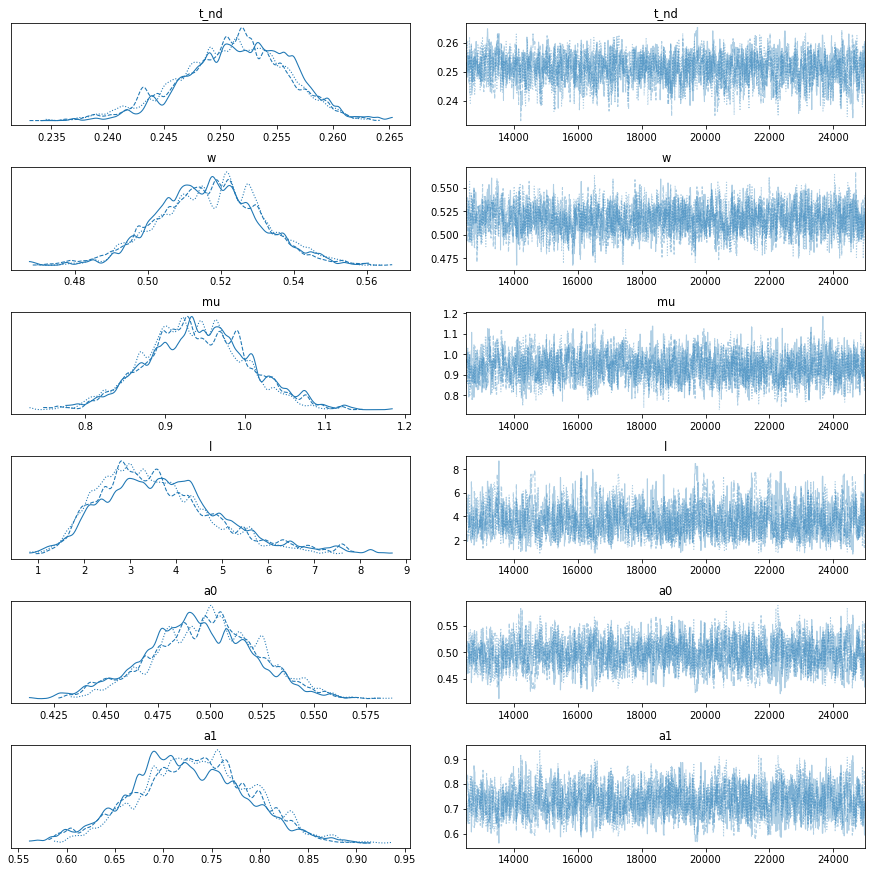

In [6]:
# plot posteriors
pbd.plot_trace(file_name = 'tutorial4', burnin = 12500);


In [7]:
# summary of posteriors
pbd.summary(file_name = 'tutorial4', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.251,0.005,0.243,0.260,0.000,0.000,920.0,1392.0,1.01
w,0.517,0.014,0.490,0.542,0.000,0.000,1262.0,1919.0,1.00
mu,0.939,0.063,0.821,1.056,0.002,0.001,1126.0,1453.0,1.01
l,3.638,1.274,1.441,6.036,0.043,0.032,923.0,940.0,1.01
a0,0.497,0.025,0.448,0.545,0.001,0.001,940.0,1057.0,1.01
a1,0.730,0.058,0.625,0.841,0.002,0.001,880.0,910.0,1.01
